## Import Libraries

In [36]:
%pip install pandas
import pandas as pd
import numpy as np

# visualization
%pip install matplotlib
import matplotlib.pyplot as plt
%pip install seaborn
import seaborn as sns
%matplotlib inline
sns.set(style='darkgrid')

import warnings
warnings.filterwarnings('ignore')

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\LEGION\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\LEGION\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\Users\LEGION\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


## Load Data

In [37]:
tweet_df = pd.read_csv('https://raw.githubusercontent.com/GigasTaufan/Indonesian-Hate-Speech-Classification/master/hate_speech_dataset.csv')
tweet_df.head()

,Label,Tweet
0,Non_HS,RT @spardaxyz: Fadli Zon Minta Mendagri Segera...
1,Non_HS,RT @baguscondromowo: Mereka terus melukai aksi...
2,Non_HS,Sylvi: bagaimana gurbernur melakukan kekerasan...
3,Non_HS,"Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja..."
4,Non_HS,RT @lisdaulay28: Waspada KTP palsu.....kawal P...


Terdapat 2 kolom. Label dan Tweet. Kolom Label berisi kelas dari tweet. Kelas Non_HS menandakan bahwa tweet tersebut bukan termasuk kategori hate speech. Kelas HS menandakan bahwa tweet tersebut termasuk kategori hate speech.

In [38]:
# contoh tweet Non_HS
tweet_df[tweet_df['Label']=='Non_HS'].head()

,Label,Tweet
0,Non_HS,RT @spardaxyz: Fadli Zon Minta Mendagri Segera...
1,Non_HS,RT @baguscondromowo: Mereka terus melukai aksi...
2,Non_HS,Sylvi: bagaimana gurbernur melakukan kekerasan...
3,Non_HS,"Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja..."
4,Non_HS,RT @lisdaulay28: Waspada KTP palsu.....kawal P...


In [39]:
tweet_df['Tweet'][0]

'RT @spardaxyz: Fadli Zon Minta Mendagri Segera Menonaktifkan Ahok Jadi Gubernur DKI https:\\/\\/t.co\\/KH5vIRwPdO'

In [40]:
# contoh tweet HS
tweet_df[tweet_df['Label']=='HS'].head()

,Label,Tweet
453,HS,"Ini pasti salah Jokowi, Ahok dan kafir-kafir a..."
454,HS,@fahmiabuazzam1 biar aja biar tai nya kena bap...
455,HS,RT @BungWinar: Angin memporakporandakan basis ...
456,HS,"RT @Lupuz0503: Prestasi Ahok, \nSelain mjadi m..."
457,HS,Ulama Kompak Nyatakan #HaramPemimpinKafir Pili...


In [41]:
tweet_df['Tweet'][453]

'Ini pasti salah Jokowi, Ahok dan kafir-kafir ateis. https:\\/\\/t.co\\/v2GRcUeStI'

In [42]:
# check missing values
tweet_df.isnull().sum().sort_values(ascending=False)

Label    0
Tweet    0
dtype: int64

Tidak ada missing values

## Class Distribution

Non_HS    453
HS        260
Name: Label, dtype: int64


AxesSubplot(0.125,0.125;0.775x0.755)


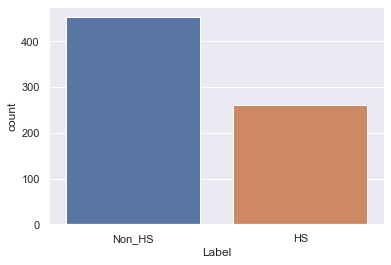

In [43]:
print(tweet_df['Label'].value_counts())
print('\n')
print(sns.countplot(tweet_df['Label']))

Jumlah kelas Non_HS lebih banyak dari jumlah kelas HS

In [44]:
jum_Non_HS = tweet_df[tweet_df['Label']=='Non_HS']['Label'].count()
jum_HS = tweet_df[tweet_df['Label']=='HS']['Label'].count()

percent_Non_HS = (jum_Non_HS/(jum_Non_HS+jum_HS)*100)
percent_HS= (jum_HS/(jum_Non_HS+jum_Non_HS))*100
print(percent_Non_HS)
print(percent_HS)

63.5343618513324
28.697571743929362


In [45]:
# info dataset
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713 entries, 0 to 712
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   713 non-null    object
 1   Tweet   713 non-null    object
dtypes: object(2)
memory usage: 11.3+ KB


In [46]:
# describe dataset
tweet_df.describe()

,Label,Tweet
count,713,713
unique,2,703
top,Non_HS,pertunjukan yang sangat membuat saya serius da...
freq,453,2


array([<AxesSubplot:title={'center':'HS'}>,
       <AxesSubplot:title={'center':'Non_HS'}>], dtype=object)

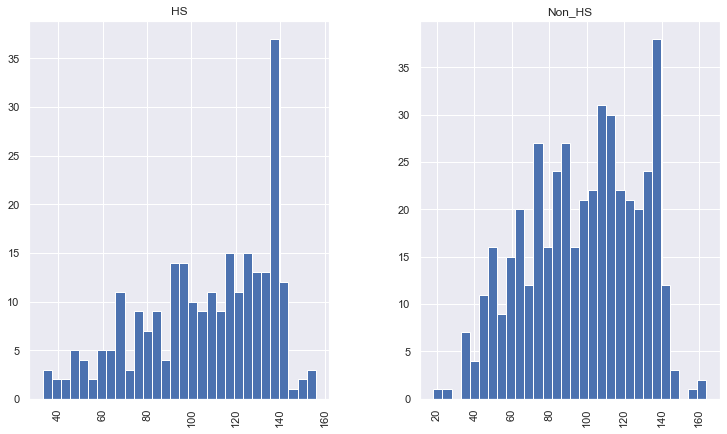

In [47]:
tweet_df['length'] = tweet_df['Tweet'].apply(len)
tweet_df.hist(column='length', by='Label', bins=30, figsize=(12,7))

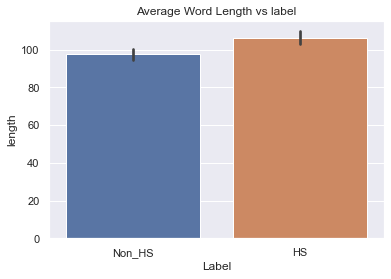

In [48]:
fig1 = sns.barplot(x='Label',y='length',data = tweet_df)
plt.title('Average Word Length vs label')
plot = fig1.get_figure()

## Preprocessing

In [49]:
df =tweet_df.copy()

### Case Folding

In [50]:
import re

In [51]:
def case_folding(data):
  temp_tweet = []

  for tw in data:
    # removal of @name[mention]
    tw = re.sub(r"(?:\@|https?\://)\S+", "", tw)

    # removal of links[https://blabala.com]
    # tw = re.sub(r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", "", tw)
    tw = re.sub(r"http\S+", "", tw)

    # removal of new line
    tw = re.sub('\n', '', tw)

    # removal of RT
    tw = re.sub('RT', '', tw)

    # removal of punctuations and numbers
    tw = re.sub("[^a-zA-Z^']", " ", tw)
    tw = re.sub(" {2,}", " ", tw)

    # remove leading and trailing whitespace
    tw = tw.strip()

    # remove whitespace with a single space
    tw = re.sub(r'\s+', ' ', tw)

    # convert text to Lowercase
    tw = tw.lower();
    temp_tweet.append(tw)
  return temp_tweet

In [52]:
df['Case_folded']=case_folding(df['Tweet'])
df.head()

,Label,Tweet,length,Case_folded
0,Non_HS,RT @spardaxyz: Fadli Zon Minta Mendagri Segera...,110,fadli zon minta mendagri segera menonaktifkan ...
1,Non_HS,RT @baguscondromowo: Mereka terus melukai aksi...,108,mereka terus melukai aksi dalam rangka memenja...
2,Non_HS,Sylvi: bagaimana gurbernur melakukan kekerasan...,116,sylvi bagaimana gurbernur melakukan kekerasan ...
3,Non_HS,"Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja...",115,ahmad dhani tak puas debat pilkada masalah jal...
4,Non_HS,RT @lisdaulay28: Waspada KTP palsu.....kawal P...,79,waspada ktp palsu kawal pilkada


### Tokenize

In [53]:
%pip install nltk
import nltk
nltk.download('punkt')

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\LEGION\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LEGION\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [54]:
def tokenized(data):
  return data.apply(nltk.word_tokenize)

In [55]:
df['Tokenized']=tokenized(df['Case_folded'])
df.head()

,Label,Tweet,length,Case_folded,Tokenized
0,Non_HS,RT @spardaxyz: Fadli Zon Minta Mendagri Segera...,110,fadli zon minta mendagri segera menonaktifkan ...,"[fadli, zon, minta, mendagri, segera, menonakt..."
1,Non_HS,RT @baguscondromowo: Mereka terus melukai aksi...,108,mereka terus melukai aksi dalam rangka memenja...,"[mereka, terus, melukai, aksi, dalam, rangka, ..."
2,Non_HS,Sylvi: bagaimana gurbernur melakukan kekerasan...,116,sylvi bagaimana gurbernur melakukan kekerasan ...,"[sylvi, bagaimana, gurbernur, melakukan, keker..."
3,Non_HS,"Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja...",115,ahmad dhani tak puas debat pilkada masalah jal...,"[ahmad, dhani, tak, puas, debat, pilkada, masa..."
4,Non_HS,RT @lisdaulay28: Waspada KTP palsu.....kawal P...,79,waspada ktp palsu kawal pilkada,"[waspada, ktp, palsu, kawal, pilkada]"


### Stemming

In [56]:
%pip install Sastrawi

     ------------------------------------ 209.7/209.7 KB 797.7 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\LEGION\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [57]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [58]:
def stemming(data):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()

  return [stemmer.stem(tweet) for tweet in data]

In [59]:
df['Stemmed'] = df['Tokenized'].apply(stemming)
df.head()

,Label,Tweet,length,Case_folded,Tokenized,Stemmed
0,Non_HS,RT @spardaxyz: Fadli Zon Minta Mendagri Segera...,110,fadli zon minta mendagri segera menonaktifkan ...,"[fadli, zon, minta, mendagri, segera, menonakt...","[fadli, zon, minta, mendagri, segera, nonaktif..."
1,Non_HS,RT @baguscondromowo: Mereka terus melukai aksi...,108,mereka terus melukai aksi dalam rangka memenja...,"[mereka, terus, melukai, aksi, dalam, rangka, ...","[mereka, terus, luka, aksi, dalam, rangka, pen..."
2,Non_HS,Sylvi: bagaimana gurbernur melakukan kekerasan...,116,sylvi bagaimana gurbernur melakukan kekerasan ...,"[sylvi, bagaimana, gurbernur, melakukan, keker...","[sylvi, bagaimana, gurbernur, laku, keras, per..."
3,Non_HS,"Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja...",115,ahmad dhani tak puas debat pilkada masalah jal...,"[ahmad, dhani, tak, puas, debat, pilkada, masa...","[ahmad, dhani, tak, puas, debat, pilkada, masa..."
4,Non_HS,RT @lisdaulay28: Waspada KTP palsu.....kawal P...,79,waspada ktp palsu kawal pilkada,"[waspada, ktp, palsu, kawal, pilkada]","[waspada, ktp, palsu, kawal, pilkada]"


### Slang Words Removal

In [61]:
%pip install requests
import requests

     -------------------------------------- 62.8/62.8 KB 835.0 kB/s eta 0:00:00
     -------------------------------------- 160.2/160.2 KB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 61.2/61.2 KB 1.6 MB/s eta 0:00:00
     -------------------------------------- 139.0/139.0 KB 1.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\Users\LEGION\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [62]:
slang_word = requests.get('https://raw.githubusercontent.com/louisowen6/NLP_bahasa_resources/master/combined_slang_words.txt').text
dict_slang = eval(slang_word)

In [63]:
dict_slang.items()

dict_items([('@', 'di'), ('abis', 'habis'), ('ad', 'ada'), ('adlh', 'adalah'), ('afaik', 'as far as i know'), ('ahaha', 'haha'), ('aj', 'saja'), ('ajep-ajep', 'dunia gemerlap'), ('ak', 'saya'), ('akika', 'aku'), ('akkoh', 'aku'), ('akuwh', 'aku'), ('alay', 'norak'), ('alow', 'halo'), ('ambilin', 'ambilkan'), ('ancur', 'hancur'), ('anjrit', 'anjing'), ('anter', 'antar'), ('ap2', 'apa-apa'), ('apasih', 'apa sih'), ('apes', 'sial'), ('aps', 'apa'), ('aq', 'saya'), ('aquwh', 'aku'), ('asbun', 'asal bunyi'), ('aseekk', 'asyik'), ('asekk', 'asyik'), ('asem', 'asam'), ('aspal', 'asli tetapi palsu'), ('astul', 'asal tulis'), ('ato', 'atau'), ('au ah', 'tidak mau tahu'), ('awak', 'saya'), ('ay', 'sayang'), ('ayank', 'sayang'), ('b4', 'sebelum'), ('bakalan', 'akan'), ('bandes', 'bantuan desa'), ('bangedh', 'banget'), ('banpol', 'bantuan polisi'), ('banpur', 'bantuan tempur'), ('basbang', 'basi'), ('bcanda', 'bercanda'), ('bdg', 'bandung'), ('begajulan', 'nakal'), ('beliin', 'belikan'), ('bencong

In [64]:
slang_df = pd.DataFrame(dict_slang.items(), columns=['Old', 'New'])
slang_df.head()

,Old,New
0,@,di
1,abis,habis
2,ad,ada
3,adlh,adalah
4,afaik,as far as i know


In [65]:
# remove trailing white space
slang_df['Old'] = slang_df['Old'].apply(lambda x: x.strip())
slang_df['New'] = slang_df['New'].apply(lambda x: x.strip())

In [66]:
# transform into key value in a dict
slang_dict = {}
for i, row in slang_df.iterrows():
  slang_dict.update({row['Old']: row['New']})

In [67]:
def removeSlang(data):
  # iterate through data
  for i, word in enumerate(data):
    # check if data in slang dictionary or not
    try:
      data[i] = slang_dict[word]
    # if data is not slang then pass
    except KeyError:
      pass
  return data

In [68]:
df['No_Slang'] = df['Stemmed'].apply(removeSlang)
df.head()

,Label,Tweet,length,Case_folded,Tokenized,Stemmed,No_Slang
0,Non_HS,RT @spardaxyz: Fadli Zon Minta Mendagri Segera...,110,fadli zon minta mendagri segera menonaktifkan ...,"[fadli, zon, minta, mendagri, segera, menonakt...","[fadli, zon, minta, mendagri, segera, nonaktif...","[fadli, zon, minta, mendagri, segera, nonaktif..."
1,Non_HS,RT @baguscondromowo: Mereka terus melukai aksi...,108,mereka terus melukai aksi dalam rangka memenja...,"[mereka, terus, melukai, aksi, dalam, rangka, ...","[mereka, terus, luka, aksi, dalam, rangka, pen...","[mereka, terus, luka, aksi, dalam, rangka, pen..."
2,Non_HS,Sylvi: bagaimana gurbernur melakukan kekerasan...,116,sylvi bagaimana gurbernur melakukan kekerasan ...,"[sylvi, bagaimana, gurbernur, melakukan, keker...","[sylvi, bagaimana, gurbernur, laku, keras, per...","[sylvi, bagaimana, gurbernur, laku, keras, per..."
3,Non_HS,"Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja...",115,ahmad dhani tak puas debat pilkada masalah jal...,"[ahmad, dhani, tak, puas, debat, pilkada, masa...","[ahmad, dhani, tidak, puas, debat, pemilihan k...","[ahmad, dhani, tidak, puas, debat, pemilihan k..."
4,Non_HS,RT @lisdaulay28: Waspada KTP palsu.....kawal P...,79,waspada ktp palsu kawal pilkada,"[waspada, ktp, palsu, kawal, pilkada]","[waspada, ktp, palsu, kawal, pemilihan kepala ...","[waspada, ktp, palsu, kawal, pemilihan kepala ..."


### Stop Words Removal

In [69]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LEGION\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [70]:
def removeStopWords(data):
  stop_words = set(stopwords.words('indonesian'))
  return data.apply(lambda x: [item for item in x if item not in stop_words])

In [71]:
df['No_Stop']=removeStopWords(df['No_Slang'])
df.head()

,Label,Tweet,length,Case_folded,Tokenized,Stemmed,No_Slang,No_Stop
0,Non_HS,RT @spardaxyz: Fadli Zon Minta Mendagri Segera...,110,fadli zon minta mendagri segera menonaktifkan ...,"[fadli, zon, minta, mendagri, segera, menonakt...","[fadli, zon, minta, mendagri, segera, nonaktif...","[fadli, zon, minta, mendagri, segera, nonaktif...","[fadli, zon, mendagri, nonaktif, ahok, gubernu..."
1,Non_HS,RT @baguscondromowo: Mereka terus melukai aksi...,108,mereka terus melukai aksi dalam rangka memenja...,"[mereka, terus, melukai, aksi, dalam, rangka, ...","[mereka, terus, luka, aksi, dalam, rangka, pen...","[mereka, terus, luka, aksi, dalam, rangka, pen...","[luka, aksi, rangka, penjara, ahok, ahok, gaga..."
2,Non_HS,Sylvi: bagaimana gurbernur melakukan kekerasan...,116,sylvi bagaimana gurbernur melakukan kekerasan ...,"[sylvi, bagaimana, gurbernur, melakukan, keker...","[sylvi, bagaimana, gurbernur, laku, keras, per...","[sylvi, bagaimana, gurbernur, laku, keras, per...","[sylvi, gurbernur, laku, keras, perempuan, buk..."
3,Non_HS,"Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja...",115,ahmad dhani tak puas debat pilkada masalah jal...,"[ahmad, dhani, tak, puas, debat, pilkada, masa...","[ahmad, dhani, tidak, puas, debat, pemilihan k...","[ahmad, dhani, tidak, puas, debat, pemilihan k...","[ahmad, dhani, puas, debat, pemilihan kepala d..."
4,Non_HS,RT @lisdaulay28: Waspada KTP palsu.....kawal P...,79,waspada ktp palsu kawal pilkada,"[waspada, ktp, palsu, kawal, pilkada]","[waspada, ktp, palsu, kawal, pemilihan kepala ...","[waspada, ktp, palsu, kawal, pemilihan kepala ...","[waspada, ktp, palsu, kawal, pemilihan kepala ..."


## Encoding Target Value

In [72]:
df['Label'] = df['Label'].apply(lambda x: 1 if x == 'HS' else 0)
df.head()

,Label,Tweet,length,Case_folded,Tokenized,Stemmed,No_Slang,No_Stop
0,0,RT @spardaxyz: Fadli Zon Minta Mendagri Segera...,110,fadli zon minta mendagri segera menonaktifkan ...,"[fadli, zon, minta, mendagri, segera, menonakt...","[fadli, zon, minta, mendagri, segera, nonaktif...","[fadli, zon, minta, mendagri, segera, nonaktif...","[fadli, zon, mendagri, nonaktif, ahok, gubernu..."
1,0,RT @baguscondromowo: Mereka terus melukai aksi...,108,mereka terus melukai aksi dalam rangka memenja...,"[mereka, terus, melukai, aksi, dalam, rangka, ...","[mereka, terus, luka, aksi, dalam, rangka, pen...","[mereka, terus, luka, aksi, dalam, rangka, pen...","[luka, aksi, rangka, penjara, ahok, ahok, gaga..."
2,0,Sylvi: bagaimana gurbernur melakukan kekerasan...,116,sylvi bagaimana gurbernur melakukan kekerasan ...,"[sylvi, bagaimana, gurbernur, melakukan, keker...","[sylvi, bagaimana, gurbernur, laku, keras, per...","[sylvi, bagaimana, gurbernur, laku, keras, per...","[sylvi, gurbernur, laku, keras, perempuan, buk..."
3,0,"Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja...",115,ahmad dhani tak puas debat pilkada masalah jal...,"[ahmad, dhani, tak, puas, debat, pilkada, masa...","[ahmad, dhani, tidak, puas, debat, pemilihan k...","[ahmad, dhani, tidak, puas, debat, pemilihan k...","[ahmad, dhani, puas, debat, pemilihan kepala d..."
4,0,RT @lisdaulay28: Waspada KTP palsu.....kawal P...,79,waspada ktp palsu kawal pilkada,"[waspada, ktp, palsu, kawal, pilkada]","[waspada, ktp, palsu, kawal, pemilihan kepala ...","[waspada, ktp, palsu, kawal, pemilihan kepala ...","[waspada, ktp, palsu, kawal, pemilihan kepala ..."


In [73]:
# combine cleaned text after removing stop words into one string
df['Ready'] = df['No_Stop'].apply(lambda x: ' '.join(x))
df.head()

,Label,Tweet,length,Case_folded,Tokenized,Stemmed,No_Slang,No_Stop,Ready
0,0,RT @spardaxyz: Fadli Zon Minta Mendagri Segera...,110,fadli zon minta mendagri segera menonaktifkan ...,"[fadli, zon, minta, mendagri, segera, menonakt...","[fadli, zon, minta, mendagri, segera, nonaktif...","[fadli, zon, minta, mendagri, segera, nonaktif...","[fadli, zon, mendagri, nonaktif, ahok, gubernu...",fadli zon mendagri nonaktif ahok gubernur dki
1,0,RT @baguscondromowo: Mereka terus melukai aksi...,108,mereka terus melukai aksi dalam rangka memenja...,"[mereka, terus, melukai, aksi, dalam, rangka, ...","[mereka, terus, luka, aksi, dalam, rangka, pen...","[mereka, terus, luka, aksi, dalam, rangka, pen...","[luka, aksi, rangka, penjara, ahok, ahok, gaga...",luka aksi rangka penjara ahok ahok gagal pemil...
2,0,Sylvi: bagaimana gurbernur melakukan kekerasan...,116,sylvi bagaimana gurbernur melakukan kekerasan ...,"[sylvi, bagaimana, gurbernur, melakukan, keker...","[sylvi, bagaimana, gurbernur, laku, keras, per...","[sylvi, bagaimana, gurbernur, laku, keras, per...","[sylvi, gurbernur, laku, keras, perempuan, buk...",sylvi gurbernur laku keras perempuan bukti fot...
3,0,"Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja...",115,ahmad dhani tak puas debat pilkada masalah jal...,"[ahmad, dhani, tak, puas, debat, pilkada, masa...","[ahmad, dhani, tidak, puas, debat, pemilihan k...","[ahmad, dhani, tidak, puas, debat, pemilihan k...","[ahmad, dhani, puas, debat, pemilihan kepala d...",ahmad dhani puas debat pemilihan kepala daerah...
4,0,RT @lisdaulay28: Waspada KTP palsu.....kawal P...,79,waspada ktp palsu kawal pilkada,"[waspada, ktp, palsu, kawal, pilkada]","[waspada, ktp, palsu, kawal, pemilihan kepala ...","[waspada, ktp, palsu, kawal, pemilihan kepala ...","[waspada, ktp, palsu, kawal, pemilihan kepala ...",waspada ktp palsu kawal pemilihan kepala daerah


## Combine Cleaned Tweet and Label

In [74]:
data1 = df[['Ready']]
data2 = df[['Label']]
dataset = pd.concat([data1, data2], axis=1)
dataset.head()

,Ready,Label
0,fadli zon mendagri nonaktif ahok gubernur dki,0
1,luka aksi rangka penjara ahok ahok gagal pemil...,0
2,sylvi gurbernur laku keras perempuan bukti fot...,0
3,ahmad dhani puas debat pemilihan kepala daerah...,0
4,waspada ktp palsu kawal pemilihan kepala daerah,0


## Text Vectorization (TF-IDF)

In [76]:
%pip install sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

You should consider upgrading via the 'c:\Users\LEGION\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 7.3/7.3 MB 843.8 kB/s eta 0:00:00
Using legacy 'setup.py install' for sklearn, since package 'wheel' is not installed.
  Running setup.py install for sklearn: started
  Running setup.py install for sklearn: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


In [77]:
X = dataset['Ready']
label = dataset['Label']

In [78]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_vector = tfidf_vectorizer.fit_transform(X)
tfidf_vector.shape

(713, 1951)

## Dealing With Imbalance Class

In [80]:
%pip install imblearn
from imblearn.over_sampling import SMOTE

You should consider upgrading via the 'c:\Users\LEGION\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


     -------------------------------------- 199.3/199.3 KB 2.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [81]:
sampler = SMOTE()
tfidf_vector, label = sampler.fit_resample(tfidf_vector, label)
print(tfidf_vector.shape)
print(label.shape)

(906, 1951)
(906,)


## Split Data (Training and Testing Data)

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_vector, label, test_size=0.2, shuffle=True, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(724, 1951)
(182, 1951)
(724,)
(182,)


## Most Common Words VS Importants Words

In [84]:
feature_names = np.array(tfidf_vectorizer.get_feature_names())

# Sort TFIDF by value
max_tf_idfs = X_train.max(0).toarray()[0] # Get largest tfidf values across all documents.
sorted_tf_idxs = max_tf_idfs.argsort() # Sorted indices
sorted_tf_idfs = max_tf_idfs[sorted_tf_idxs] # Sorted TFIDF values

# feature_names doesn't need to be sorted! You just access it with a list of sorted indices!
smallest_tf_idfs = pd.Series(sorted_tf_idfs[:10], index=feature_names[sorted_tf_idxs[:10]])                    
largest_tf_idfs = pd.Series(sorted_tf_idfs[-10:][::-1], index=feature_names[sorted_tf_idxs[-10:][::-1]])

In [85]:
print('Most common words:\n', smallest_tf_idfs)
print('\n')
print('Most important words:\n', largest_tf_idfs)

Most common words:
 lisan        0.0
some         0.0
bidik        0.0
bijak        0.0
kubur        0.0
kreta        0.0
kras         0.0
kpk          0.0
bismillah    0.0
bkerja       0.0
dtype: float64


Most important words:
 perempuan    0.969216
tangguh      0.960130
karya        0.955319
keren        0.947947
seru         0.910673
dukung       0.888721
nang         0.878559
kesi         0.868267
mantap       0.867034
akun         0.845751
dtype: float64


##WordCloud

In [87]:
%pip install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

     -------------------------------------- 153.1/153.1 KB 1.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\Users\LEGION\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


### Hate Speech Wordcloud

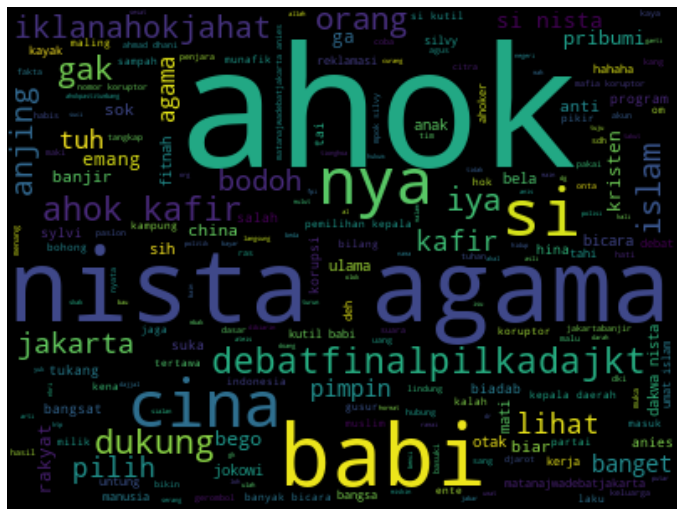

In [88]:
hs_words = ' '.join([word for word in dataset['Ready'][dataset['Label']==1]])
wordcloud = WordCloud(width=400, height=300, max_font_size=100).generate(hs_words)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Non Hate Speech Wordcloud

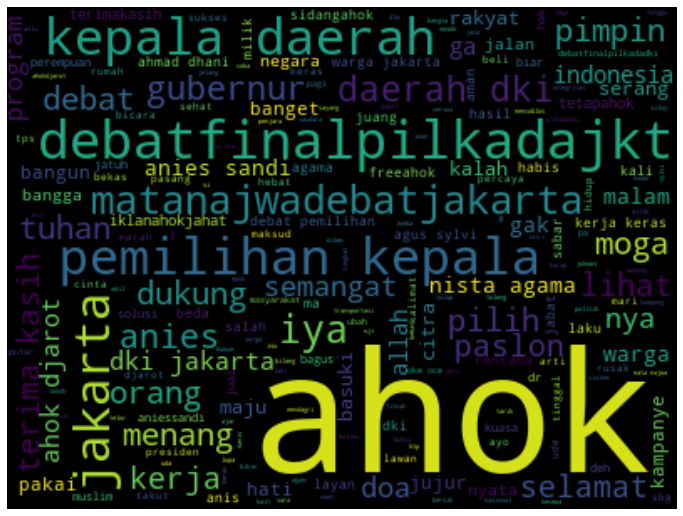

In [89]:
nonhs_words = ' '.join([word for word in dataset['Ready'][dataset['Label']==0]])
wordcloud = WordCloud(width=400, height=300, max_font_size=100).generate(nonhs_words)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Modelling

In [91]:
%pip install mlxtend
from mlxtend.plotting import plot_confusion_matrix
from sklearn import metrics

     ---------------------------------------- 1.3/1.3 MB 2.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\LEGION\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [92]:
def print_conf(y_test, result, classes, title='Confusion matrix'):
  conf_matrix = metrics.confusion_matrix(y_test, result)
  plt.figure(figsize=(6,6))
  sns.heatmap(conf_matrix, 
              annot=True,
              xticklabels=classes, 
              yticklabels=classes,
              cmap="Blues",
              fmt='d')
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.title(title)
  plt.show()

### SVM

In [93]:
from sklearn.svm import SVC

In [94]:
svc = SVC(kernel='linear')
svc.fit(X_train, y_train) #training svc model
y_pred_svc = svc.predict(X_test) # predicting test data

In [95]:
print(svc.score(X_train, y_train))
print(svc.score(X_test, y_test))

0.988950276243094
0.9340659340659341


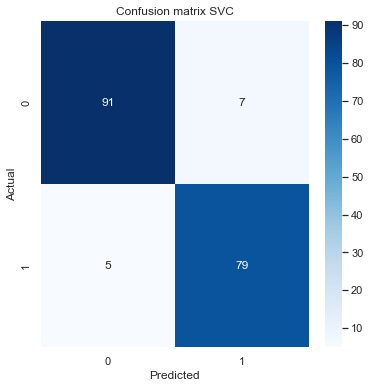

In [96]:
print_conf(y_test, y_pred_svc, [0, 1], title="Confusion matrix SVC")

In [97]:
print(metrics.classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        98
           1       0.92      0.94      0.93        84

    accuracy                           0.93       182
   macro avg       0.93      0.93      0.93       182
weighted avg       0.93      0.93      0.93       182



### XGBOOST

In [99]:
%pip install xgboost
from xgboost import XGBClassifier

     -------------------------------------- 125.4/125.4 MB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\LEGION\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [100]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train) #training svc model
y_pred_xgb = xgb.predict(X_test) # predicting test data

In [101]:
print(xgb.score(X_train, y_train))
print(xgb.score(X_test, y_test))

0.9861878453038674
0.8681318681318682


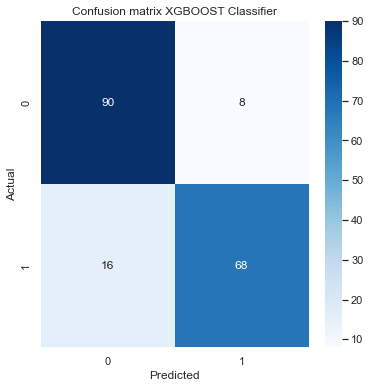

In [102]:
print_conf(y_test, y_pred_xgb, [0, 1], title="Confusion matrix XGBOOST Classifier")

In [103]:
print(metrics.classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88        98
           1       0.89      0.81      0.85        84

    accuracy                           0.87       182
   macro avg       0.87      0.86      0.87       182
weighted avg       0.87      0.87      0.87       182



#### XGBOOOST - RandomizedSearchCV

In [104]:
from sklearn.model_selection import RandomizedSearchCV

In [105]:
params = {'learning_rate': [0.025, 0.05, 0.075, 0.1], #so called `eta` value
          'max_depth': [6, 7, 8],
          'min_child_weight': [i for i in range(1, 11, 2)],
          'n_estimators': [100, 250, 500] #number of trees, change it to 1000 for better results
}


In [106]:
random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=5, scoring='f1', n_jobs=-1, cv=5, verbose=3)

In [107]:
random_search.fit(tfidf_vector, label)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           callbacks=None, colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=0, gpu_id=-1,
                                           grow_policy='depthwise',
                                           importance_type=None,
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_bin=256,...
                                           max_leaves=0, min_child_weight=1,
                                           missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=100, n_jobs=0,
                                           num_parallel_tree=1,
                                           predictor='auto', random_state=0,
                                           reg_alpha=0, reg_lambda=1, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'learning_rate': [0.025, 0.05, 0.075,
                                                          0.1],
                                        'max_depth': [6, 7, 8],
                                        'min_child_weight': [1, 3, 5, 7, 9],
                                        'n_estimators': [100, 250, 500]},
                   scoring='f1', verbose=3)

In [108]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.075, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=250,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [109]:
random_search.best_params_

{'n_estimators': 250,
 'min_child_weight': 1,
 'max_depth': 6,
 'learning_rate': 0.075}

In [112]:
xgb_rscv = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.025, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=250, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
xgb_rscv.fit(X_train, y_train) #training svc model
y_pred_xgb_rscv = xgb_rscv.predict(X_test) # predicting test data

XGBoostError: [10:35:11] c:\users\administrator\workspace\xgboost-win64_release_1.6.0\src\c_api\c_api_utils.h:159: Invalid missing value: null

In [ ]:
print(xgb_rscv.score(X_train, y_train))
print(xgb_rscv.score(X_test, y_test))

0.9281767955801105
0.8901098901098901


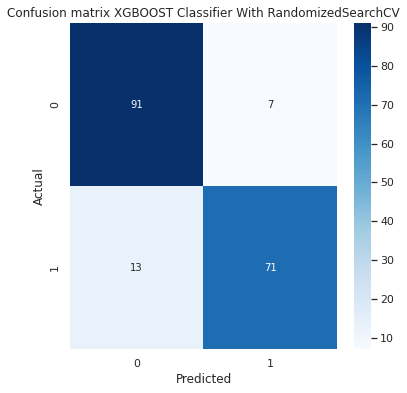

In [ ]:
print_conf(y_test, y_pred_xgb_rscv, [0, 1], title="Confusion matrix XGBOOST Classifier With RandomizedSearchCV")

### Neural Network

In [ ]:
%pip install tensorflow

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.4.0


In [ ]:
%pip install keras

In [ ]:
# Import Libraries for Neural Network
from keras.models import Sequential
from keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
# Add model for Neural Network
input_dim = X_train.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(30, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(15, activation='relu'))
model.add(layers.Dense(15, activation='relu'))
model.add(layers.Dense(15, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
          
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                58560     
_________________________________________________________________
dense_1 (Dense)              (None, 15)                465       
_________________________________________________________________
dense_2 (Dense)              (None, 15)                240       
_________________________________________________________________
dense_3 (Dense)              (None, 15)                240       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 16        
Total params: 59,521
Trainable params: 59,521
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# run model
history = model.fit(X_train, y_train, epochs=10, verbose=True, validation_data=(X_test, y_test), batch_size=10)

Epoch 1/10
73/73 [==============================] - 1s 9ms/step - loss: 0.6896 - accuracy: 0.5469 - val_loss: 0.6382 - val_accuracy: 0.8462
Epoch 2/10
73/73 [==============================] - 0s 3ms/step - loss: 0.5399 - accuracy: 0.8861 - val_loss: 0.2757 - val_accuracy: 0.9286
Epoch 3/10
73/73 [==============================] - 0s 3ms/step - loss: 0.0988 - accuracy: 0.9893 - val_loss: 0.2004 - val_accuracy: 0.9066
Epoch 4/10
73/73 [==============================] - 0s 3ms/step - loss: 0.0137 - accuracy: 1.0000 - val_loss: 0.2204 - val_accuracy: 0.9066
Epoch 5/10
73/73 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.2280 - val_accuracy: 0.9066
Epoch 6/10
73/73 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.2411 - val_accuracy: 0.9121
Epoch 7/10
73/73 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.2483 - val_accuracy: 0.9121
Epoch 8/10
73/73 [==

In [ ]:
# Check the Accuracy
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 1.0000
Testing Accuracy:  0.9121


In [ ]:
# Plot accuracy
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

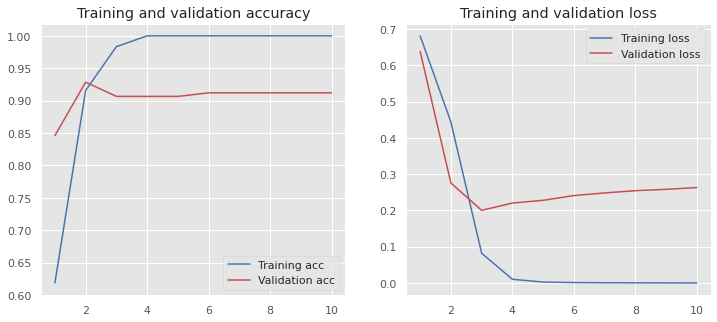

In [ ]:
plot_history(history)

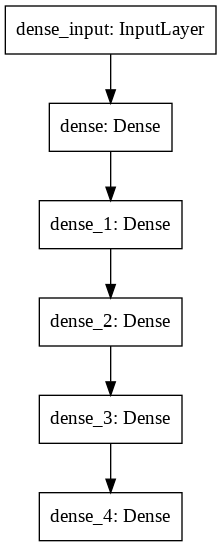

In [ ]:
# Save Model Layer
from tensorflow.keras.utils import plot_model
plot_model(model)

In [ ]:
# Save Model
model.save('model', save_format="tf")

INFO:tensorflow:Assets written to: model/assets


## Model Comparison

In [ ]:
# Accuracy Comparison
models = ['SVM', 'XGBOOST', 'RandomSearchCV','Neural Network']
accSVMC = metrics.accuracy_score(y_test,y_pred_svc)
accXGB = metrics.accuracy_score(y_test, y_pred_xgb)
accXGB_RSCV = metrics.accuracy_score(y_test, y_pred_xgb_rscv)
accuracies = [accSVMC, accXGB, accXGB_RSCV , accuracy]
comp = pd.DataFrame(list(zip(models, accuracies)), columns=['Model', 'Accuracy'])
comp

,Model,Accuracy
0,SVM,0.934066
1,XGBOOST,0.879121
2,RandomSearchCV,0.890110
3,Neural Network,0.912088


In [ ]:
import joblib

# Saving model
joblib.dump(svc, 'Hate Speech Classifier.joblib')
joblib.dump(tfidf_vectorizer, 'Hate Speech TF-IDF Vectorizer.joblib')

['Hate Speech TF-IDF Vectorizer.joblib']

In [ ]:
df['prediction'] = svc.predict(tfidf_vectorizer.transform(df['Tweet']))
df['prediction'] = df['prediction'].apply(lambda x: 'HS' if x==1 else 'Non_HS')

# Save new dataframe into csv file
df.to_csv('Hate Speech Classification.csv', index=False)

df.head()

,Label,Tweet,length,Case_folded,Tokenized,Stemmed,No_Slang,No_Stop,Ready,prediction
0,0,RT @spardaxyz: Fadli Zon Minta Mendagri Segera...,110,fadli zon minta mendagri segera menonaktifkan ...,"[fadli, zon, minta, mendagri, segera, menonakt...","[fadli, zon, minta, mendagri, segera, nonaktif...","[fadli, zon, minta, mendagri, segera, nonaktif...","[fadli, zon, mendagri, nonaktif, ahok, gubernu...",fadli zon mendagri nonaktif ahok gubernur dki,Non_HS
1,0,RT @baguscondromowo: Mereka terus melukai aksi...,108,mereka terus melukai aksi dalam rangka memenja...,"[mereka, terus, melukai, aksi, dalam, rangka, ...","[mereka, terus, luka, aksi, dalam, rangka, pen...","[mereka, terus, luka, aksi, dalam, rangka, pen...","[luka, aksi, rangka, penjara, ahok, ahok, gaga...",luka aksi rangka penjara ahok ahok gagal pemil...,Non_HS
2,0,Sylvi: bagaimana gurbernur melakukan kekerasan...,116,sylvi bagaimana gurbernur melakukan kekerasan ...,"[sylvi, bagaimana, gurbernur, melakukan, keker...","[sylvi, bagaimana, gurbernur, laku, keras, per...","[sylvi, bagaimana, gurbernur, laku, keras, per...","[sylvi, gurbernur, laku, keras, perempuan, buk...",sylvi gurbernur laku keras perempuan bukti fot...,HS
3,0,"Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja...",115,ahmad dhani tak puas debat pilkada masalah jal...,"[ahmad, dhani, tak, puas, debat, pilkada, masa...","[ahmad, dhani, tidak, puas, debat, pemilihan k...","[ahmad, dhani, tidak, puas, debat, pemilihan k...","[ahmad, dhani, puas, debat, pemilihan kepala d...",ahmad dhani puas debat pemilihan kepala daerah...,Non_HS
4,0,RT @lisdaulay28: Waspada KTP palsu.....kawal P...,79,waspada ktp palsu kawal pilkada,"[waspada, ktp, palsu, kawal, pilkada]","[waspada, ktp, palsu, kawal, pemilihan kepala ...","[waspada, ktp, palsu, kawal, pemilihan kepala ...","[waspada, ktp, palsu, kawal, pemilihan kepala ...",waspada ktp palsu kawal pemilihan kepala daerah,Non_HS


## Predict New Data

In [ ]:
input_tweet = ['dasar cina',
               'terima kasih KPU pilkada berjalan lancar mantap djiwa njir']

def preProcessText(tweer):
    new_tweets = []
    for tw in texts:
        tw = case_folding(tw)
        tw = tokenized(tw)
        tw = stemming(tw)
        tw = removeSlang(tw)
        tw = removeStopWords(tw)
        tw = ' '.join(tw)
        new_tweets.append(tw)

    return new_tweets

def predictNewData(tweets):
    saved_model = joblib.load('Hate Speech Classifier.joblib') 
    saved_tfidf = joblib.load('Hate Speech TF-IDF Vectorizer.joblib')

    vectorized_tweets = saved_tfidf.transform(tweets)
    input_prediction = saved_model.predict(vectorized_tweets)

    for i in range(len(input_tweet)):
        if input_prediction[i]==1:
            print('Input text:\n', 
                input_tweet[i], 
                '\nPrediction: \nHate Speech!\n')
        else:
            print('Input text:\n', 
                input_tweet[i], 
                "\nPrediction: \nNot a Hate Speech.\n")
            
predictNewData(input_tweet)

Input text:
 dasar cina 
Prediction: 
Hate Speech!

Input text:
 terima kasih KPU pilkada berjalan lancar mantap djiwa njir 
Prediction: 
Not a Hate Speech.

